# Descriptive analysis of local transportation


This is Exploratory Descriptive Analisys of expendure with local transportation. So we will create three notebook to explore the data of the follows subquotas: 'Taxi, toll and parking', 'Automotive vehicle renting or charter' and 'Fuels and lubricants'. We basically used the same analysis used by Irio in his descriptive analysis of all dataset in https://github.com/datasciencebr/serenata-de-amor/blob/master/develop/2016-08-13-irio-descriptive-analysis.ipynb

The analysis of others subquota are in:

'Fuels and lubricants': work in progress

'Taxi, toll and parking': https://github.com/datasciencebr/serenata-de-amor/blob/master/develop/2017-03-15-fabiocorreacordeiro-taxi-descriptive-analysis.ipynb

### This notebook is about subquota 'Automotive vehicle renting or charter' 

Importing the dataset

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [3]:
data = pd.read_csv('../data/2017-03-14-reimbursements.xz',
                   parse_dates=[16],
                   low_memory=False,
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str,})

All reimbursement of subquota 'Automotive vehicle renting or charter' will be set in **data_rent** variable, this is the main data who we will will use in this notebook.

In [4]:
data_rent = data[data['subquota_description'] == 'Automotive vehicle renting or charter']

Since 2013 was 15.625 documents of reimbursement.

In [5]:
print(data_rent.shape)

(15625, 31)


In [6]:
data_rent.head()

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
789905,2013,1007,5333239,NaN,5800.0,4654,EDSON EZEQUIEL,74838,298,2011.0,...,2014-01-03T00:00:00,5800.0,0.0,5800.0,12,0,NaN,NaN,1108258,NaN
790842,2013,1010,5310470,NaN,4500.0,4489,EDUARDO BARBOSA,74655,230,2015.0,...,2013-12-28T00:00:00,4500.0,0.0,4500.0,12,0,NaN,NaN,1083642,NaN
790843,2013,1010,5310488,NaN,1900.0,4489,EDUARDO BARBOSA,74655,230,2015.0,...,2013-12-28T00:00:00,1900.0,0.0,1900.0,12,0,NaN,NaN,1083642,NaN
790844,2013,1010,5310496,NaN,1900.0,4489,EDUARDO BARBOSA,74655,230,2015.0,...,2013-12-28T00:00:00,1900.0,0.0,1900.0,12,0,NaN,NaN,1083642,NaN
790845,2013,1010,5310505,NaN,1500.0,4489,EDUARDO BARBOSA,74655,230,2015.0,...,2013-12-28T00:00:00,1500.0,0.0,1500.0,12,0,NaN,NaN,1083642,NaN


In [7]:
data_rent.iloc[0]

year                                                           2013
applicant_id                                                   1007
document_id                                                 5333239
reimbursement_value_total                                       NaN
total_net_value                                                5800
reimbursement_numbers                                          4654
congressperson_name                                  EDSON EZEQUIEL
congressperson_id                                             74838
congressperson_document                                         298
term                                                           2011
state                                                            RJ
party                                                          PMDB
term_id                                                          54
subquota_number                                                 120
subquota_description          Automotive vehicle

All the expedures sums more than **R$64 Million**

In [8]:
data_rent['net_values'].sum()

64150710.269999996

In [9]:
data_rent['net_values'].describe()

count    15625.000000
mean      4105.645457
std       2545.949560
min          0.070000
25%       2221.660000
50%       3595.000000
75%       5500.000000
max      10900.000000
Name: net_values, dtype: float64

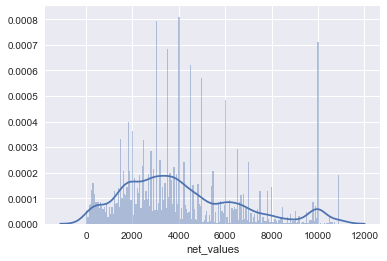

In [10]:
sns.distplot(data_rent['net_values'],bins=200)

The most expensive reimbursement was **R$10,900**

In [11]:
most_expensive_reimbursement = \
    data_rent[data_rent['net_values'] == data_rent['net_values'].max()].iloc[0]
most_expensive_reimbursement

year                                                           2015
applicant_id                                                   1289
document_id                                                 5685002
reimbursement_value_total                                       NaN
total_net_value                                               10900
reimbursement_numbers                                          5040
congressperson_name                                 NILTON CAPIXABA
congressperson_id                                             74359
congressperson_document                                          47
term                                                           2015
state                                                            RO
party                                                           PTB
term_id                                                          55
subquota_number                                                 120
subquota_description          Automotive vehicle

When we see the 'net_values' distribution we note a wired concentration near of value of R$10,000. So we considered outliers all reimbursement value greater than 9,500.

We found 1,014 reimbursement in a total of R$10,271,519.16

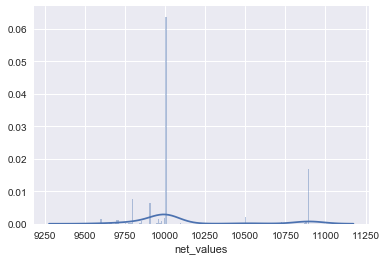

In [12]:
outliers = data_rent[data_rent['net_values'] > 9500]
sns.distplot(outliers['net_values'],bins=150)

In [13]:
print (len(outliers),len(outliers)/len(data_rent))

1014 0.064896


In [14]:
outliers['net_values'].sum()

10271519.16

In [15]:
outliers

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
827176,2013,1637,5291174,NaN,10000.0,4464,FÁBIO SOUTO,74062,190,2011.0,...,2013-12-05T00:00:00,10800.0,800.0,10000.00,11,0,NaN,NaN,1077885,NaN
827186,2013,1637,5315712,NaN,10000.0,"4515, 4506",FÁBIO SOUTO,74062,190,2011.0,...,2013-12-27T00:00:00,10800.0,800.0,9844.64,12,0,NaN,NaN,1084960,NaN
877134,2013,1953,5285548,NaN,9800.0,4462,VITOR PENIDO,141557,532,2011.0,...,2013-11-30T00:00:00,9800.0,0.0,9800.00,11,0,NaN,NaN,1076046,NaN
904877,2013,2280,5337352,NaN,10000.0,4605,VINICIUS GURGEL,160591,16,2015.0,...,2013-12-30T00:00:00,10000.0,0.0,10000.00,12,0,NaN,NaN,1091296,NaN
911084,2013,2300,5310335,NaN,9600.0,4491,PROFESSORA DORINHA SEABRA REZENDE,160639,67,2015.0,...,2014-01-02T00:00:00,9600.0,0.0,9600.00,12,0,NaN,NaN,1083647,NaN
920914,2013,2338,5297776,NaN,9785.0,4469,ASSIS CARVALHO,159237,111,2015.0,...,2013-12-11T00:00:00,9785.0,0.0,9785.00,12,0,NaN,NaN,1080002,NaN
989786,2014,1074,5336706,NaN,10000.0,4566,ARNON BEZERRA,74291,90,2015.0,...,2014-02-01T00:00:00,10000.0,0.0,10000.00,2,0,NaN,NaN,1091173,NaN
989793,2014,1074,5359044,NaN,10000.0,4606,ARNON BEZERRA,74291,90,2015.0,...,2014-03-01T00:00:00,10000.0,0.0,10000.00,3,0,NaN,NaN,1097654,NaN
989839,2014,1074,5386048,NaN,10000.0,4650,ARNON BEZERRA,74291,90,2015.0,...,2014-04-01T00:00:00,10000.0,0.0,10000.00,4,0,NaN,NaN,1105760,NaN
989847,2014,1074,5408530,NaN,10000.0,4681,ARNON BEZERRA,74291,90,2015.0,...,2014-05-01T00:00:00,10000.0,0.0,10000.00,5,0,NaN,NaN,1111884,NaN


## Who are these applicants?

In total 649 congressperson ask by reimbursement and they received a mean of R$98,845.47 (the same price of a car model 2017 http://veiculos.fipe.org.br?carro/toyota/3-2017/002112-1/2017/g/chdwdshts7l18).

In [16]:
len(data_rent['applicant_id'].unique())

649

In [17]:
applicants_by_net_value = \
    pd.DataFrame(data_rent.groupby(['applicant_id'], as_index=False).sum()[['applicant_id', 'net_values']])

In [18]:
congressperson_list = data_rent[
    ['applicant_id', 'congressperson_name', 'party', 'state']]
congressperson_list = congressperson_list. \
    drop_duplicates('applicant_id', keep='first')
ranking = pd.merge(applicants_by_net_value,
                   congressperson_list,
                   how='left',
                   on='applicant_id').sort_values('net_values', ascending=False)
ranking.head(10)

,applicant_id,net_values,congressperson_name,party,state
55,1074,355627.29,ARNON BEZERRA,PTB,CE
90,1325,350244.16,CARLOS EDUARDO CADOCA,PDT,PE
223,1877,349320.00,LÚCIO VALE,PR,PA
92,1332,344200.00,GIVALDO CARIMBÃO,PHS,AL
437,2820,342655.59,FABIO REIS,PMDB,SE
325,2300,340970.00,PROFESSORA DORINHA SEABRA REZENDE,DEM,TO
263,1973,332400.00,SILVIO COSTA,PTdoB,PE
297,2264,331800.00,PASTOR EURICO,PHS,PE
224,1879,325980.00,LUIZ FERNANDO FARIA,PP,MG
119,1542,323750.00,ASSIS DO COUTO,PDT,PR


In [19]:
ranking['net_values'].describe()

count       649.000000
mean      98845.470370
std       79941.595237
min          35.000000
25%       32309.100000
50%       80750.000000
75%      149400.000000
max      355627.290000
Name: net_values, dtype: float64

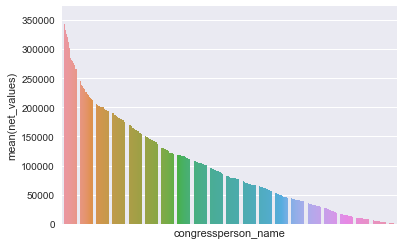

In [20]:
graph = sns.barplot(x='congressperson_name',
                    y='net_values',
                    data=ranking)
graph.axes.get_xaxis().set_ticks([]); None

Now let's investigate the congresspeople who asked for reimbursement greater than R$9,500.

In [21]:
congressperson_outlier = outliers[
    ['applicant_id', 'congressperson_name', 'party', 'state']]
congressperson_outlier = congressperson_outlier. \
    drop_duplicates('applicant_id', keep='first')
ranking_outlier = pd.merge(applicants_by_net_value,
                   congressperson_outlier,
                   how='left',
                   on='applicant_id').sort_values('net_values', ascending=False)
ranking_outlier.head(10)

,applicant_id,net_values,congressperson_name,party,state
55,1074,355627.29,ARNON BEZERRA,PTB,CE
90,1325,350244.16,NaN,NaN,NaN
223,1877,349320.00,NaN,NaN,NaN
92,1332,344200.00,GIVALDO CARIMBÃO,PHS,AL
437,2820,342655.59,FABIO REIS,PMDB,SE
325,2300,340970.00,PROFESSORA DORINHA SEABRA REZENDE,DEM,TO
263,1973,332400.00,SILVIO COSTA,PTdoB,PE
297,2264,331800.00,NaN,NaN,NaN
224,1879,325980.00,NaN,NaN,NaN
119,1542,323750.00,ASSIS DO COUTO,PDT,PR


When we analyze the expenses of 2016 of congressman Assis do Couto we noted he use all the value allowed in subquota. He maintained a rented car during all year, not only during work travel. All his expenses was R$124.998,05 and the same car new cost R159.256,00 (http://veiculos.fipe.org.br?carro/mitsubishi/3-2017/022132-5/32000/d/jb1s59gpwqcb).

Jan- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/5914104.pdf

Feb- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/5933052.pdf

Mar- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/5977587.pdf

Apr- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/6018073.pdf

Mai- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/6018302.pdf

Jun- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/6062144.pdf

Jul- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/6077662.pdf

Ago- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/6098398.pdf

Sep- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/6125142.pdf

Oct- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/6154773.pdf

Nov- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2016/6169069.pdf

Dez- http://www.camara.gov.br/cota-parlamentar//documentos/publ/1542/2017/6193296.pdf

# Suppliers

In [22]:
suppliers_list = pd.DataFrame(data_rent.groupby(['cnpj_cpf','supplier'], as_index=False)['net_values'].sum())
suppliers_list = suppliers_list.sort_values('net_values', ascending=False)
suppliers_list.head(10)

,cnpj_cpf,supplier,net_values
119,02570474000102,WULFERT DE OLIVEIRA & CIA LTDA,909394.00
858,38024675000143,QUASAR LOCADORA DE VEÍCULOS LTDA,753422.87
337,07447405000111,ELF LOCADORA DE VEÍCULOS LTDA. - EPP,701719.16
447,09400977000170,MARCHIORI E MARCHIORI LTDA ME,691413.77
519,10892621000180,KARPER RENT A CAR,596403.53
408,08659172000183,LOCAR NEW VEÍCULOS E MÁQUINAS LTDA,559746.51
289,06911368000198,H. L. R. GUTERRES LOCADORA E TRANSPORTE,523237.71
788,19224740000130,Transmoura Locação de veículos,491234.67
810,20927167000100,Barros e Serra Serviços Executivos,467300.00
326,07319323000191,PANTANAL VEICULOS LTDA ME,467010.15


In [23]:
suppliers_list['net_values'].describe()

count       928.000000
mean      69127.920550
std      103059.689706
min           4.500000
25%        4580.000000
50%       27750.600000
75%       96615.032500
max      909394.000000
Name: net_values, dtype: float64

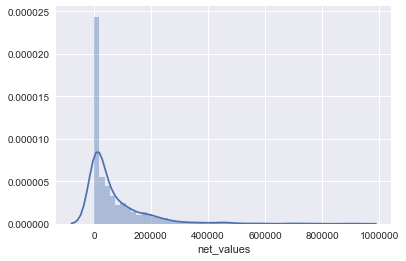

In [24]:
sns.distplot(suppliers_list['net_values'])

Here we check all suppliers of outliers reimbursements (greater than R$9,500)

In [25]:
suppliers_outliers = pd.DataFrame(outliers.groupby(['cnpj_cpf','supplier'], as_index=False)['net_values'].sum())
suppliers_outliers = suppliers_outliers.sort_values('net_values', ascending=False)
suppliers_outliers.head(10)

,cnpj_cpf,supplier,net_values
29,06911368000198,H. L. R. GUTERRES LOCADORA E TRANSPORTE,457065.9
11,03631148000112,STYLE RENT A CAR,378400.0
62,11849722000131,BRIZZA COMÉRCIO DE VEICULOS LTDA,323750.0
9,03219650000110,A&E LOCADORA LTDA,301700.0
31,06983735000169,LEMANS LOCAÇÃO BOA VISTA LTDA,259000.0
86,18957117000123,J.M. LOCAÇÃO,247776.8
60,11208910000180,CAPITAL SERVIÇOS LTDA,245000.0
39,07708533000171,LOK AUTO LOCADORA DE AUTOMÓVEIS LTDA,235440.0
2,00838464000171,UNIVERSAL - LOCADORA DE VEICULOS S/C LTDA,228800.0
52,10287457000182,TOCANTINS LOCADORA DE VEÍCULOS,220000.0


In [26]:
suppliers_outliers['net_values'].describe()

count       105.000000
mean      97823.992000
std       90395.985733
min        9700.000000
25%       20000.000000
50%       63600.000000
75%      160000.000000
max      457065.900000
Name: net_values, dtype: float64

In [27]:
suppliers_outliers['net_values'].sum()

10271519.16

# Conclusion and next steps

We didn't found anything clearly illegal, but we noted that some congressmen use this subquota to maintain a car constantly rented to use, not only rent a car when are travel. This kind of use could be a divergence of the main idea of this subquota.

The next steps are:
- Check the expenses in the time (by year, month and day)
- Cross the data of 'Fuels and lubricants' with "Taxi, toll and parking" and 'Fuels and lubricants'. 
- Cross data of congresspeople and suppliers.